In [1]:
## import statements ##

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train_tweet.csv')

# Cleaning the data

In [3]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [4]:
import re
def process_tweet(tweet):
    tweet=str(tweet)
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [5]:
def sentiment(label):
    if label<0:
        return -1
    elif label==0:
        return 0
    else:
        return 1

In [6]:
def sentiment_word(sentiment):
    if sentiment==-1:
        return "Negative"
    elif sentiment==1:
        return "Positive"
    else:
        return "Neutral"

In [7]:
train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)

In [8]:
train_data['sentiment'] = train_data['label'].apply(sentiment)

In [9]:
train_data['tweet_sentiment'] = train_data['sentiment'].apply(sentiment_word)

In [10]:
train_data.head(10)

,label,tweet,processed_tweets,sentiment,tweet_sentiment
0,-0.300000,RT @backtolife_2022: EU agrees common purchase...,rt 2022 eu agrees common purchase of vaccine a...,-1,Negative
1,0.000000,COVID-19 Vaccinations for children between the...,covid 19 vaccinations for children between the...,0,Neutral
2,0.000000,RT @NBPSDHealthUnit: We're in Kearney today! C...,rt we re in kearney today come see us at the e...,0,Neutral
3,0.000000,"RT @backtolife_2022: WEF 2022, Davos - Gabriel...",rt 2022 wef 2022 davos gabriela bucher executi...,0,Neutral
4,0.000000,RT @ukmfa1: Open an Inquiry into C19 Vaccine S...,rt open an inquiry into c19 vaccine safety the...,0,Neutral
5,-0.068519,@OwitzDave Next the WHO and Gates/Klaus duo wi...,next the who and gates klaus duo will want us ...,-1,Negative
6,0.000000,RT @Bongie_Haemz: Please share the myths and m...,rt haemz please share the myths and misconcept...,0,Neutral
7,0.000000,RT @CjColclough: 👀 Watch this 10 min speech by...,rt watch this 10 min speech by jeffrey sachs a...,0,Neutral
8,0.500000,RT @William81714480: Let this sink in: most of...,rt let this sink in most of the world has move...,1,Positive
9,0.500000,RT @Charles_Dust: Im sure you've been told/hea...,rt dust im sure you ve been told heard a lot o...,1,Positive


In [11]:
drop_features(['tweet'],train_data)

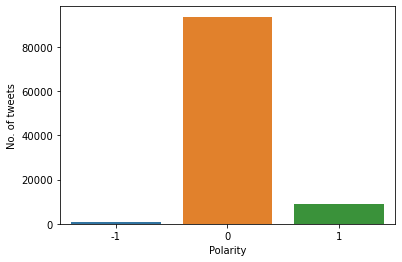

In [12]:
ax=sns.countplot(train_data['sentiment'])
ax.set(xlabel='Polarity', ylabel='No. of tweets')
fig = ax.get_figure()
fig.savefig('static/images/polarity.png') 

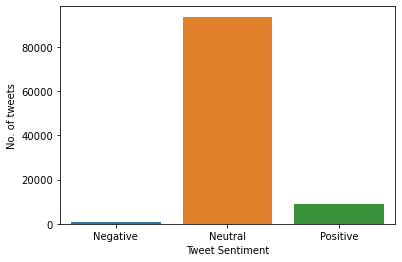

In [13]:
ax=sns.countplot(train_data['tweet_sentiment'])
ax.set(xlabel='Tweet Sentiment', ylabel='No. of tweets')
fig = ax.get_figure() 
fig.savefig('static/images/sentiment.png')